In [2]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 97.3 MB/s eta 0:

In [4]:
import pandas as pd
data = pd.read_csv('bank_transactions.csv')
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [17]:
from pycaret.clustering import *
initial_setup = setup(data, use_gpu = True)

,Description,Value
0,Session id,1711
1,Original data shape,"(4999, 9)"
2,Transformed data shape,"(4999, 14155)"
3,Ordinal features,1
4,Numeric features,3
5,Categorical features,6
6,Rows with missing values,0.5%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [18]:
kmeans_algo = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8456,14639.1828,0.4328,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
kmeans_model = assign_model(kmeans_algo)
kmeans_model

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Cluster
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.050781,2/8/16,143207,25.000000,Cluster 0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.689941,2/8/16,141858,27999.000000,Cluster 0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.439453,2/8/16,142712,459.000000,Cluster 0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.187500,2/8/16,142714,2060.000000,Cluster 3
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.430176,2/8/16,181156,1762.500000,Cluster 0
...,...,...,...,...,...,...,...,...,...,...
4994,T4995,C4224254,6/2/81,M,RAJPURA,104784.007812,22/9/16,134346,162.649994,Cluster 0
4995,T4996,C4742374,14/9/73,F,MUMBAI,866503.187500,22/9/16,101430,450.000000,Cluster 3
4996,T4997,C4112061,5/1/89,M,GUWAHATI,9448.019531,22/9/16,71507,355.000000,Cluster 0
4997,T4998,C7315849,10/2/93,M,CHANDAULI,7004.959961,22/9/16,72056,170.000000,Cluster 0


In [20]:
plot_model(kmeans_algo, plot = 'cluster')

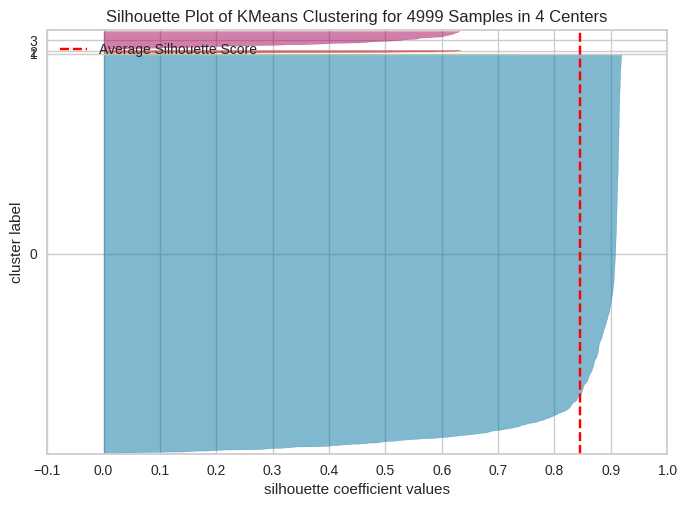

In [21]:
plot_model(kmeans_algo, plot = 'silhouette')

In [22]:
evaluate_model(kmeans_algo)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
pred = predict_model(kmeans_algo, data=data)
pred.head()

,TransactionID_T1,TransactionID_T2,TransactionID_T3,TransactionID_T4,TransactionID_T5,TransactionID_T6,TransactionID_T7,TransactionID_T8,TransactionID_T9,TransactionID_T10,...,TransactionDate_15/8/16,TransactionDate_27/8/16,TransactionDate_20/8/16,TransactionDate_23/8/16,TransactionDate_30/8/16,TransactionDate_11/8/16,TransactionDate_16/8/16,TransactionTime,TransactionAmount (INR),Cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143207.0,25.0,Cluster 0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141858.0,27999.0,Cluster 0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142712.0,459.0,Cluster 0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142714.0,2060.0,Cluster 3
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181156.0,1762.5,Cluster 0


In [24]:
saved_model = save_model(kmeans_algo, 'K_means_clustering_pycaret')

Transformation Pipeline and Model Successfully Saved


In [25]:
loaded_model = load_model('K_means_clustering_pycaret')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustAccountBalance',
                                             'TransactionTime',
                                             'TransactionAmount (INR)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['TransactionID', 'CustomerID',
                                             'CustomerDOB', 'CustGender',
                                             'CustLocation',
                                             'TransactionDate'],
                                    transform...
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['TransactionID', 'CustomerID',
                                             'CustomerDOB', 'CustLocation',
                                             'TransactionDate'],
                                    transformer=OneHotEncoder(cols=['TransactionID',
                                                                    'CustomerID',
                                                                    'CustomerDOB',
                                                                    'CustLocation',
                                                                    'TransactionDate'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=1711))])